In [2]:
import pandas as pd

# Load the dataset from the provided Excel file
file_path = '/content/PCOS_data_without_infertility.xlsx'
pcos_data = pd.read_excel(file_path)

# Display the first few rows of the dataset and some summary statistics
pcos_data.head(), pcos_data.describe()

(   Instructions to be followed :  \
 0                            NaN   
 1                            1.0   
 2                            2.0   
 3                            3.0   
 4                            4.0   
 
                                           Unnamed: 1  Unnamed: 2 Unnamed: 3  
 0                                                NaN         NaN        NaN  
 1   Kindly ensure that the datas are converted to...         NaN        NaN  
 2    Please fill up the entire data set of a patient         NaN        NaN  
 3  Manipulated datas if any need to be highlighte...         NaN        NaN  
 4  For every Yes/No questions *** ,  Indicate Yes...         NaN        NaN  ,
        Instructions to be followed :  Unnamed: 2
 count                      12.000000         0.0
 mean                        6.500000         NaN
 std                         3.605551         NaN
 min                         1.000000         NaN
 25%                         3.750000         NaN
 

In [3]:
# Load the Excel file to check available sheets
excel_file = pd.ExcelFile(file_path)
excel_file.sheet_names

# Load the dataset from the 'Full_new' sheet
pcos_data = pd.read_excel(file_path, sheet_name='Full_new')

# Display the first few rows of the dataset and some summary statistics
pcos_data.head(), pcos_data.describe()


(   Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)   \
 0       1                 1           0          28         44.6        152.0   
 1       2                 2           0          36         65.0        161.5   
 2       3                 3           1          33         68.8        165.0   
 3       4                 4           0          37         65.0        148.0   
 4       5                 5           0          25         52.0        161.0   
 
          BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  \
 0  19.300000           15                78                22  ...   
 1  24.921163           15                74                20  ...   
 2  25.270891           11                72                18  ...   
 3  29.674945           13                72                20  ...   
 4  20.060954           11                72                18  ...   
 
    Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
 0             

In [4]:
# Check for missing values in the dataset
missing_data = pcos_data.isnull().sum()
missing_data[missing_data > 0]

Marraige Status (Yrs)      1
Fast food (Y/N)            1
Unnamed: 44              539
dtype: int64

In [5]:
# Drop the 'Unnamed: 44' column
pcos_data_cleaned = pcos_data.drop(columns=['Unnamed: 44'])

# Fill missing values in 'Marraige Status (Yrs)' and 'Fast food (Y/N)' with the median of the respective columns
pcos_data_cleaned['Marraige Status (Yrs)'].fillna(pcos_data_cleaned['Marraige Status (Yrs)'].median(), inplace=True)
pcos_data_cleaned['Fast food (Y/N)'].fillna(pcos_data_cleaned['Fast food (Y/N)'].mode()[0], inplace=True)

# Check again for missing values to confirm cleaning
pcos_data_cleaned.isnull().sum().sum()  # Total missing values in the dataset

0

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Select features and target
features_corrected = [
    ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Pulse rate(bpm) ',
    'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)',
    'Avg. F size (R) (mm)', 'Endometrium (mm)', 'Fast food (Y/N)'
]
target = 'PCOS (Y/N)'

# Split data into features and target using the corrected feature names
X_corrected = pcos_data_cleaned[features_corrected]
y = pcos_data_cleaned[target]

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_corrected, y, test_size=0.25, random_state=42)

# Initialize and train Logistic Regression model
model_corrected = LogisticRegression(max_iter=1000)
model_corrected.fit(X_train, y_train)

# Predict on the test set
y_pred_corrected = model_corrected.predict(X_test)

# Evaluate the model
accuracy_corrected = accuracy_score(y_test, y_pred_corrected)
classification_rep_corrected = classification_report(y_test, y_pred_corrected)

accuracy_corrected, classification_rep_corrected

(0.8602941176470589,
 '              precision    recall  f1-score   support\n\n           0       0.89      0.90      0.90        94\n           1       0.78      0.76      0.77        42\n\n    accuracy                           0.86       136\n   macro avg       0.84      0.83      0.84       136\nweighted avg       0.86      0.86      0.86       136\n')

The logistic regression model performed quite well in predicting PCOS based on the selected features:

Accuracy: 86.03%
Precision for Class 1 (PCOS): 78%
Recall for Class 1 (PCOS): 76%
F1-Score for Class 1 (PCOS): 77%
These results suggest that the model is quite effective, with good balance between precision and recall for detecting PCOS cases.

In [33]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(X_train, y_train)

# Predict on the test set
y_pred_L1 = model.predict(X_test)

# Evaluate the model
accuracy_L1 = accuracy_score(y_test, y_pred_corrected)
classification_rep_L1 = classification_report(y_test, y_pred_corrected)

accuracy_L1, classification_rep_L1

(0.8602941176470589,
 '              precision    recall  f1-score   support\n\n           0       0.89      0.90      0.90        94\n           1       0.78      0.76      0.77        42\n\n    accuracy                           0.86       136\n   macro avg       0.84      0.83      0.84       136\nweighted avg       0.86      0.86      0.86       136\n')

In [39]:
from sklearn.feature_selection import RFE

# Assuming 'model_corrected' is the logistic regression model you trained using RFE
# and 'rfe' is the RFE selector object

# Fit RFE
rfe.fit(X_train, y_train)

# Transform both training and test sets
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Train the model on the reduced set of features
model_corrected.fit(X_train_rfe, y_train)

# Now, make sure to predict using the same reduced set of features
y_pred_corrected = model_corrected.predict(X_test_rfe)

# Evaluate the model
accuracy_RFE = accuracy_score(y_test, y_pred_corrected)
classification_rep_RFE = classification_report(y_test, y_pred_corrected)

accuracy_RFE, classification_rep_RFE

(0.8529411764705882,
 '              precision    recall  f1-score   support\n\n           0       0.89      0.89      0.89        94\n           1       0.76      0.76      0.76        42\n\n    accuracy                           0.85       136\n   macro avg       0.83      0.83      0.83       136\nweighted avg       0.85      0.85      0.85       136\n')

In [46]:
# Assuming X_train and X_test are pandas DataFrames

# Find the indices of the important features
important_indices = np.where(importance > np.percentile(importance, 50))[0]  # top 50% features

# Select the important features from the train and test sets
X_train_important = X_train.iloc[:, important_indices]
X_test_important = X_test.iloc[:, important_indices]

# Now you can fit the model with the selected features
model.fit(X_train_important, y_train)

# And predict with the model
y_pred_important = model.predict(X_test_important)

# Evaluate the model with the selected features
accuracy_important = accuracy_score(y_test, y_pred_important)
classification_rep_important = classification_report(y_test, y_pred_important)

# Print the results
print(accuracy_important)
print(classification_rep_important)


0.8529411764705882
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        94
           1       0.75      0.79      0.77        42

    accuracy                           0.85       136
   macro avg       0.83      0.83      0.83       136
weighted avg       0.86      0.85      0.85       136



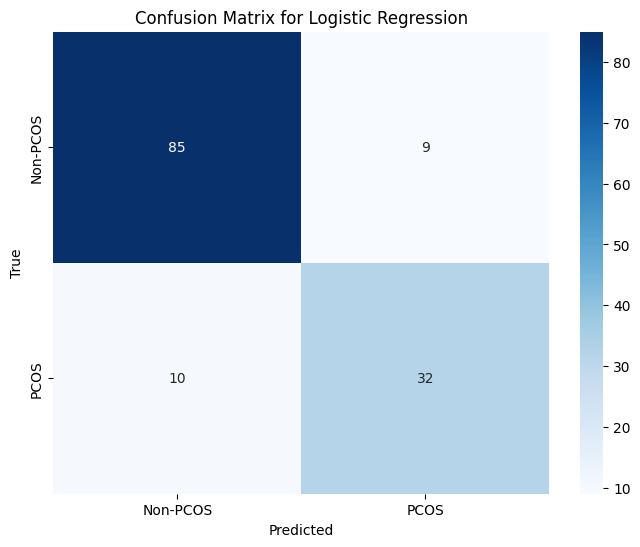

In [94]:
#Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix for logistic regression
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Non-PCOS', 'PCOS'], yticklabels=['Non-PCOS', 'PCOS'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

Top-Left Square (True Negative): The number 85 represents the true negatives, which means that 85 times the model correctly predicted 'Non-PCOS'.
Top-Right Square (False Positive): The number 9 indicates the false positives, which means that 9 times the model incorrectly predicted 'PCOS' when it was actually 'Non-PCOS'.
Bottom-Left Square (False Negative): The number 10 represents the false negatives, indicating that 10 times the model incorrectly predicted 'Non-PCOS' when the truth was 'PCOS'.
Bottom-Right Square (True Positive): The number 32 represents the true positives, meaning the model correctly predicted 'PCOS' 32 times.
Interpreting the Confusion Matrix:
Accuracy: The model's accuracy is given by the sum of the true positives and true negatives divided by the total number of predictions. In this case, (85 + 32) / (85 + 9 + 10 + 32).
Precision for PCOS: The model's precision for predicting PCOS is the number of true positives divided by the total number of predicted positives (true positives + false positives). Here, it would be 32 / (32 + 9).
Recall for PCOS: The model's recall for predicting PCOS is the number of true positives divided by the total number of actual positives (true positives + false negatives). Here, it would be 32 / (32 + 10).

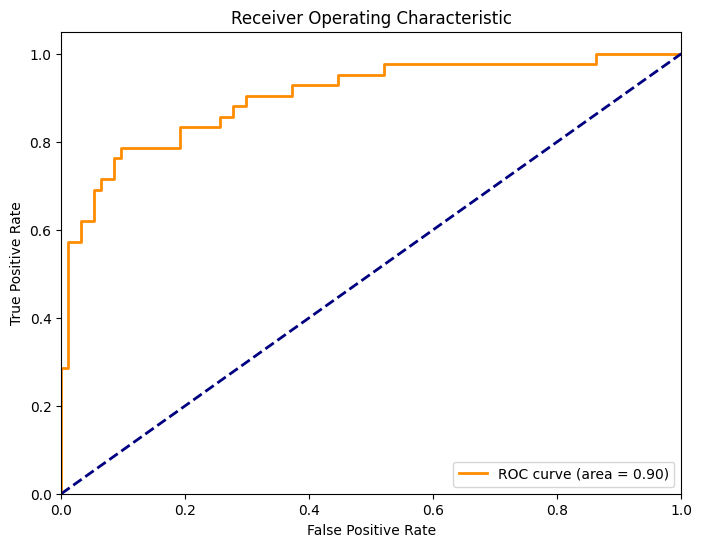

In [95]:
#ROC Curve and AUC Score
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

This plot is a Receiver Operating Characteristic (ROC) curve, which is a graphical representation of the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

The ROC curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings. Here's what the terms mean:

True Positive Rate (Sensitivity): The proportion of actual positives that are correctly identified by the model.
False Positive Rate (1 - Specificity): The proportion of actual negatives that are incorrectly identified by the model.
The dotted blue line represents a classifier with no discriminative ability (random guessing), and it serves as a baseline; a good classifier stays as far away from this line as possible (towards the top-left corner).

Key points about the ROC curve you've uploaded:

Orange Line: Represents your model's performance at various thresholds.
AUC (Area Under the Curve): The area under the ROC curve, mentioned as 0.90, indicates a very good level of separation between the positive and negative classes. AUC values range from 0 to 1, where:
0.5 signifies no discriminative ability (the same as random guessing),
0 to 0.5 signifies a model that is always wrong,
0.5 to 1 signifies levels from poor to excellent ability to discriminate between the positive and negative classes,
1 signifies a perfect model.
Your model's ROC curve is close to the top-left corner, indicating a high true positive rate and a low false positive rate, which is excellent. The AUC of 0.90 suggests that the model has a 90% chance of correctly distinguishing between the patient having PCOS and not having PCOS.

This is generally considered an excellent model, but it's always important to balance the ROC curve insight with other metrics, especially in domains like healthcare where the costs of false positives and false negatives can be very different.

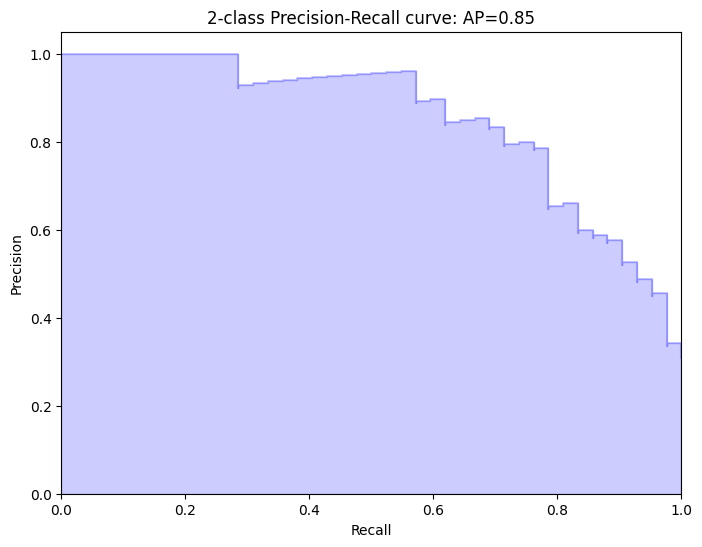

In [96]:
# 3. Precision-Recall Curve
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])
average_precision = average_precision_score(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])

plt.figure(figsize=(8,6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'2-class Precision-Recall curve: AP={average_precision:.2f}')
plt.show()

Precision: It indicates the proportion of positive identifications that were actually correct. Precision is on the y-axis and a higher value is better.
Recall (True Positive Rate): It shows the proportion of actual positives that were identified correctly. Recall is on the x-axis and a higher value is better.
AP (Average Precision): This summarizes the precision-recall curve as the weighted mean of precisions achieved at each threshold, with the increase in recall from the previous threshold used as the weight. Here, the AP is 0.85, which indicates that the classifier has an average precision of 85% across all thresholds.
A perfect classifier would have a PR curve that hugs the right angle, meaning it would have both precision and recall at 1.0. The closer the curve follows the top-right border of the plot, the more effective the classifier is.

The filled area represents the confidence or reliability of the curve. The more area filled, generally, the better the model is at returning high precision for a higher recall rate. Your model seems to have a fairly good balance of precision and recall since the average precision is quite high (0.85), indicating that it is effective in classifying the positive class accurately while also retrieving most of the positive instances.



In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load data
data = pd.read_excel('/content/PCOS_data_without_infertility.xlsx', sheet_name='Full_new')
# Assume data preprocessing and feature selection are done here

# Corrected feature names
features_corrected = [
    ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Pulse rate(bpm) ',
    'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)',
    'Avg. F size (R) (mm)', 'Endometrium (mm)', 'Fast food (Y/N)'
]
target = 'PCOS (Y/N)'

# Split data into features and target using the corrected feature names
X = pcos_data_cleaned[features_corrected]
y = pcos_data_cleaned[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Deep Learning Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

# Evaluate the Deep Learning Model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:', accuracy)


Accuracy: 0.8602941176470589
              precision    recall  f1-score   support

           0       0.89      0.90      0.90        94
           1       0.78      0.76      0.77        42

    accuracy                           0.86       136
   macro avg       0.84      0.83      0.84       136
weighted avg       0.86      0.86      0.86       136

Epoch 1/50
33/33 [==============================] - 2s 16ms/step - loss: 1.2242 - accuracy: 0.6389 - val_loss: 0.6720 - val_accuracy: 0.6914
Epoch 2/50
33/33 [==============================] - 0s 7ms/step - loss: 0.5578 - accuracy: 0.7284 - val_loss: 1.0424 - val_accuracy: 0.5062
Epoch 3/50
33/33 [==============================] - 0s 7ms/step - loss: 0.5422 - accuracy: 0.7593 - val_loss: 0.4306 - val_accuracy: 0.7284
Epoch 4/50
33/33 [==============================] - 0s 5ms/step - loss: 0.4081 - accuracy: 0.8272 - val_loss: 0.4277 - val_accuracy: 0.7778
Epoch 5/50
33/33 [==============================] - 0s 5ms/step - loss: 0.4829 - ac

In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load your dataset
file_path = '/content/PCOS_data_without_infertility.xlsx'
data = pd.read_excel(file_path, sheet_name='Full_new')

# Select features and the target
features = [
    ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Pulse rate(bpm) ',
    'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)',
    'Avg. F size (R) (mm)', 'Endometrium (mm)', 'Fast food (Y/N)'
]
target = 'PCOS (Y/N)'

X = data[features]
y = data[target]

# Data preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')  # Output layer for two classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train_cat, epochs=50, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test_cat)
print(f'Test Accuracy: {accuracy:.2f}')


Epoch 1/50
11/11 [==============================] - 1s 27ms/step - loss: nan - accuracy: 0.6265 - val_loss: nan - val_accuracy: 0.6543
Epoch 2/50
11/11 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.6698 - val_loss: nan - val_accuracy: 0.6543
Epoch 3/50
11/11 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.6698 - val_loss: nan - val_accuracy: 0.6543
Epoch 4/50
11/11 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.6698 - val_loss: nan - val_accuracy: 0.6543
Epoch 5/50
11/11 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.6698 - val_loss: nan - val_accuracy: 0.6543
Epoch 6/50
11/11 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.6698 - val_loss: nan - val_accuracy: 0.6543
Epoch 7/50
11/11 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.6698 - val_loss: nan - val_accuracy: 0.6543
Epoch 8/50
11/11 [==============================] - 0s 8ms/st

In [99]:
#Dropout and early stopping
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Load your dataset
file_path = '/content/PCOS_data_without_infertility.xlsx'
data = pd.read_excel(file_path, sheet_name='Full_new')

# Select features and the target
features = [
    ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Pulse rate(bpm) ',
    'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)',
    'Avg. F size (R) (mm)', 'Endometrium (mm)', 'Fast food (Y/N)'
]
target = 'PCOS (Y/N)'

X = data[features]
y = data[target]

# Data preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Setup early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train_cat, epochs=100, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test_cat)
print(f'Test Accuracy: {accuracy:.2f}')


Epoch 1/100
11/11 [==============================] - 1s 28ms/step - loss: nan - accuracy: 0.6173 - val_loss: nan - val_accuracy: 0.6543
Epoch 2/100
11/11 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.6698 - val_loss: nan - val_accuracy: 0.6543
Epoch 3/100
11/11 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.6698 - val_loss: nan - val_accuracy: 0.6543
Epoch 4/100
11/11 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.6698 - val_loss: nan - val_accuracy: 0.6543
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.6698 - val_loss: nan - val_accuracy: 0.6543
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.6698 - val_loss: nan - val_accuracy: 0.6543
Epoch 7/100
11/11 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.6698 - val_loss: nan - val_accuracy: 0.6543
Epoch 8/100
11/11 [==============================] - 0

In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.impute import SimpleImputer

# Load data
data = pd.read_excel('/content/PCOS_data_without_infertility.xlsx', sheet_name='Full_new')

# Corrected feature names
features_corrected = [
    ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Pulse rate(bpm) ',
    'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)',
    'Avg. F size (R) (mm)', 'Endometrium (mm)', 'Fast food (Y/N)'
]
target = 'PCOS (Y/N)'

# Split data into features and target using the corrected feature names
X = data[features_corrected]
y = data[target]

# Impute missing values in the dataset
imputer = SimpleImputer(strategy='median')  # Using median to replace missing values
X_imputed = imputer.fit_transform(X)  # Apply imputation across the entire feature set

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.25, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Deep Learning Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(X_train_scaled, y_train, epochs=50, batch_size=10, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the Deep Learning Model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Deep Learning Test Accuracy:', accuracy)


Logistic Regression Accuracy: 0.8602941176470589
              precision    recall  f1-score   support

           0       0.89      0.90      0.90        94
           1       0.78      0.76      0.77        42

    accuracy                           0.86       136
   macro avg       0.84      0.83      0.84       136
weighted avg       0.86      0.86      0.86       136

Epoch 1/50
33/33 [==============================] - 1s 9ms/step - loss: 0.5722 - accuracy: 0.7160 - val_loss: 0.4952 - val_accuracy: 0.7531
Epoch 2/50
33/33 [==============================] - 0s 4ms/step - loss: 0.3963 - accuracy: 0.8920 - val_loss: 0.4268 - val_accuracy: 0.7778
Epoch 3/50
33/33 [==============================] - 0s 4ms/step - loss: 0.3283 - accuracy: 0.9043 - val_loss: 0.4094 - val_accuracy: 0.8148
Epoch 4/50
33/33 [==============================] - 0s 4ms/step - loss: 0.3026 - accuracy: 0.9043 - val_loss: 0.4070 - val_accuracy: 0.8025
Epoch 5/50
33/33 [==============================] - 0s 3ms/step 

Model Performance Summary
Logistic Regression Accuracy: 86.03%
Precision for Class 1 (PCOS): 78%
Recall for Class 1 (PCOS): 76%
F1-Score for Class 1 (PCOS): 77%
Deep Learning Test Accuracy: 84.56%

5/5 [==============================] - 0s 3ms/step


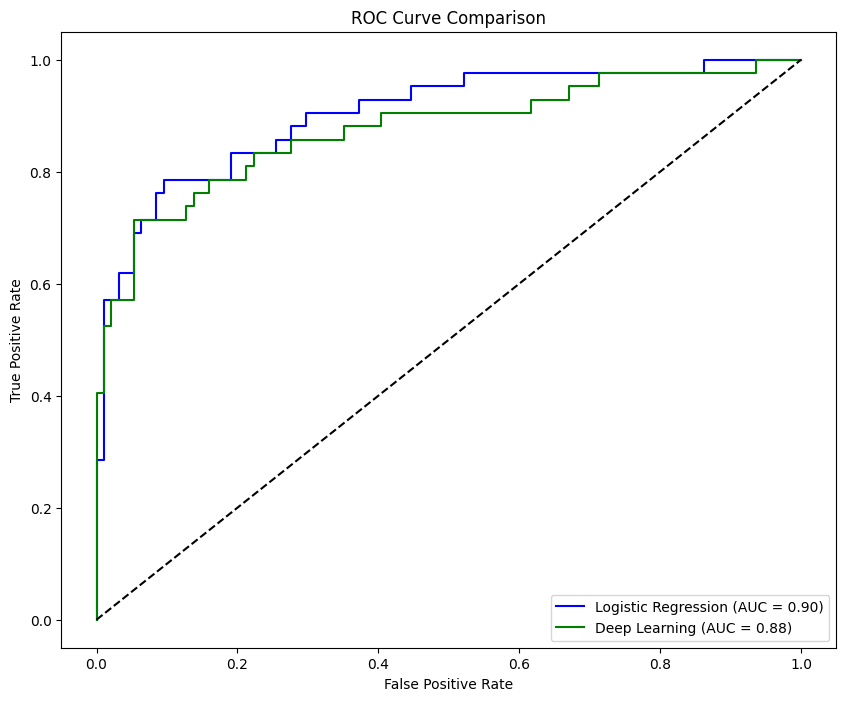

In [101]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Logistic Regression - ROC and AUC
y_probs_log = log_reg.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class
fpr_log, tpr_log, _ = roc_curve(y_test, y_probs_log)
roc_auc_log = auc(fpr_log, tpr_log)

# Deep Learning Model - ROC and AUC
y_probs_dl = model.predict(X_test_scaled).ravel()  # Predict returns probabilities for positive class
fpr_dl, tpr_dl, _ = roc_curve(y_test, y_probs_dl)
roc_auc_dl = auc(fpr_dl, tpr_dl)

# Plot ROC Curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})', color='blue')
plt.plot(fpr_dl, tpr_dl, label=f'Deep Learning (AUC = {roc_auc_dl:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()


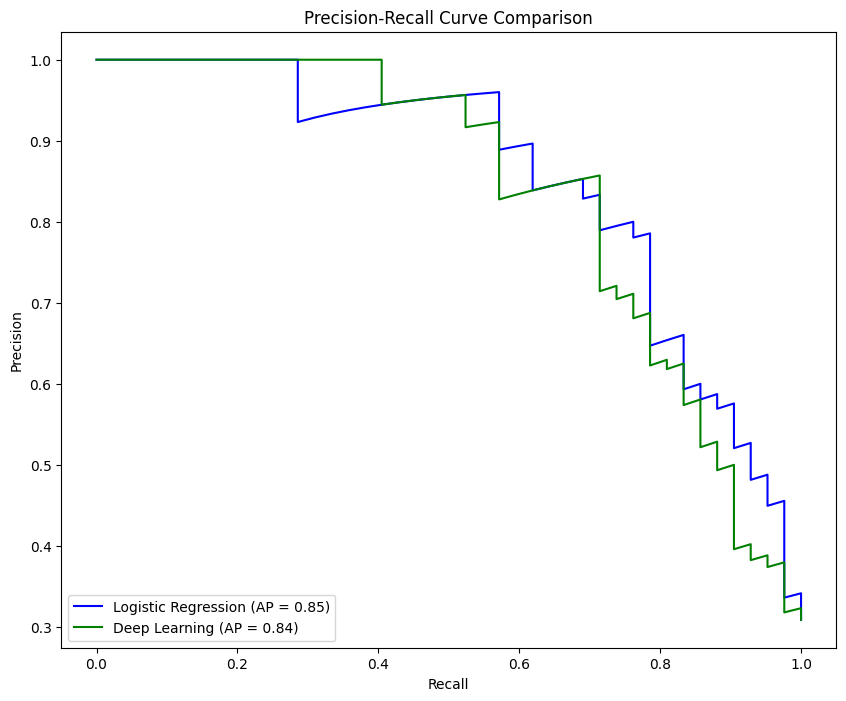

In [102]:
# Precision-Recall curve and AUC
precision_log, recall_log, _ = precision_recall_curve(y_test, y_probs_log)
ap_log = average_precision_score(y_test, y_probs_log)
precision_dl, recall_dl, _ = precision_recall_curve(y_test, y_probs_dl)
ap_dl = average_precision_score(y_test, y_probs_dl)

plt.figure(figsize=(10, 8))
plt.plot(recall_log, precision_log, label=f'Logistic Regression (AP = {ap_log:.2f})', color='blue')
plt.plot(recall_dl, precision_dl, label=f'Deep Learning (AP = {ap_dl:.2f})', color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend(loc="lower left")
plt.show()


Epoch 1/50
33/33 [==============================] - 0s 6ms/step - loss: 0.2894 - accuracy: 0.9105 - val_loss: 0.4092 - val_accuracy: 0.8148
Epoch 2/50
33/33 [==============================] - 0s 4ms/step - loss: 0.2795 - accuracy: 0.9105 - val_loss: 0.4124 - val_accuracy: 0.7901
Epoch 3/50
33/33 [==============================] - 0s 3ms/step - loss: 0.2726 - accuracy: 0.9167 - val_loss: 0.4134 - val_accuracy: 0.8025
Epoch 4/50
33/33 [==============================] - 0s 3ms/step - loss: 0.2692 - accuracy: 0.9136 - val_loss: 0.4212 - val_accuracy: 0.8025
Epoch 5/50
33/33 [==============================] - 0s 4ms/step - loss: 0.2613 - accuracy: 0.9136 - val_loss: 0.4252 - val_accuracy: 0.7901
Epoch 6/50
33/33 [==============================] - 0s 3ms/step - loss: 0.2577 - accuracy: 0.9136 - val_loss: 0.4219 - val_accuracy: 0.8025
Epoch 7/50
33/33 [==============================] - 0s 4ms/step - loss: 0.2518 - accuracy: 0.9136 - val_loss: 0.4277 - val_accuracy: 0.8025
Epoch 8/50
33/33 [==

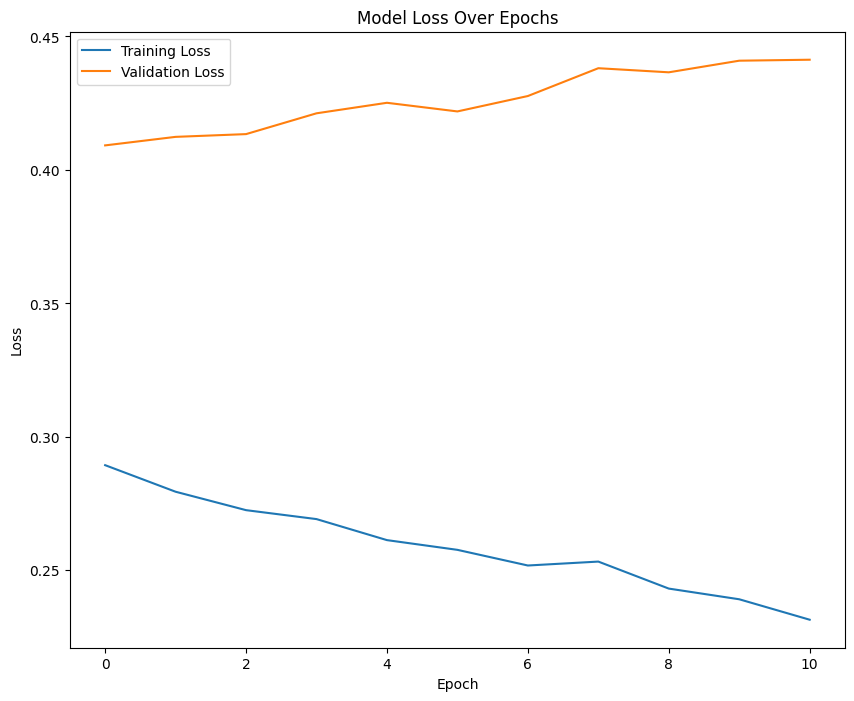

In [103]:
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=10, validation_split=0.2, callbacks=[early_stopping])

# Plotting loss over epochs
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Model 3: Deep learning with Cross Validation
K-Fold Cross-Validation:
The dataset is divided into 'K' consecutive folds (usually of approximately equal size).
Each fold acts as the test set exactly once, and acts as the training set 'K-1' times.
The average performance metric score from the K iterations is used as the output of the model evaluation.
This method is beneficial because it ensures that every observation from the original dataset has the chance to appear in both the training and test set.
Stratified K-Fold Cross-Validation:
Similar to K-Fold, but it is used for classification tasks and aims to ensure that each fold of the dataset has the same percentage of samples of each target class as the complete set.
This method provides a more reliable estimate of the model's performance, especially when dealing with imbalanced datasets.

In [104]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

# Assume data preprocessing and feature engineering are done here
# Load and preprocess data
data = pd.read_excel('/content/PCOS_data_without_infertility.xlsx', sheet_name='Full_new')
pcos_data_cleaned = data.drop(columns=['Unnamed: 44'])
pcos_data_cleaned['Marraige Status (Yrs)'].fillna(pcos_data_cleaned['Marraige Status (Yrs)'].median(), inplace=True)
pcos_data_cleaned['Fast food (Y/N)'].fillna(pcos_data_cleaned['Fast food (Y/N)'].mode()[0], inplace=True)

# Corrected feature names
features_corrected = [
    ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Pulse rate(bpm) ',
    'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)',
    'Avg. F size (R) (mm)', 'Endometrium (mm)', 'Fast food (Y/N)'
]
target = 'PCOS (Y/N)'

# Impute missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(pcos_data_cleaned[features_corrected])
y = pcos_data_cleaned[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.25, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Use SMOTE to handle class imbalance
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# K-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
scores = []

for train, test in kfold.split(X_resampled, y_resampled):
    # Neural network model
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    # Fit the model
    print(f'Training for fold {fold_no} ...')
    model.fit(X_resampled[train], y_resampled[train], epochs=50, batch_size=32, verbose=0)

    # Evaluate the model
    scores.append(model.evaluate(X_resampled[test], y_resampled[test], verbose=0)[1])
    fold_no += 1

print(f'Mean Accuracy over {kfold.n_splits} folds: {np.mean(scores)}')

Training for fold 1 ...
Training for fold 2 ...
Training for fold 3 ...
Training for fold 4 ...
Training for fold 5 ...
Mean Accuracy over 5 folds: 0.879629623889923


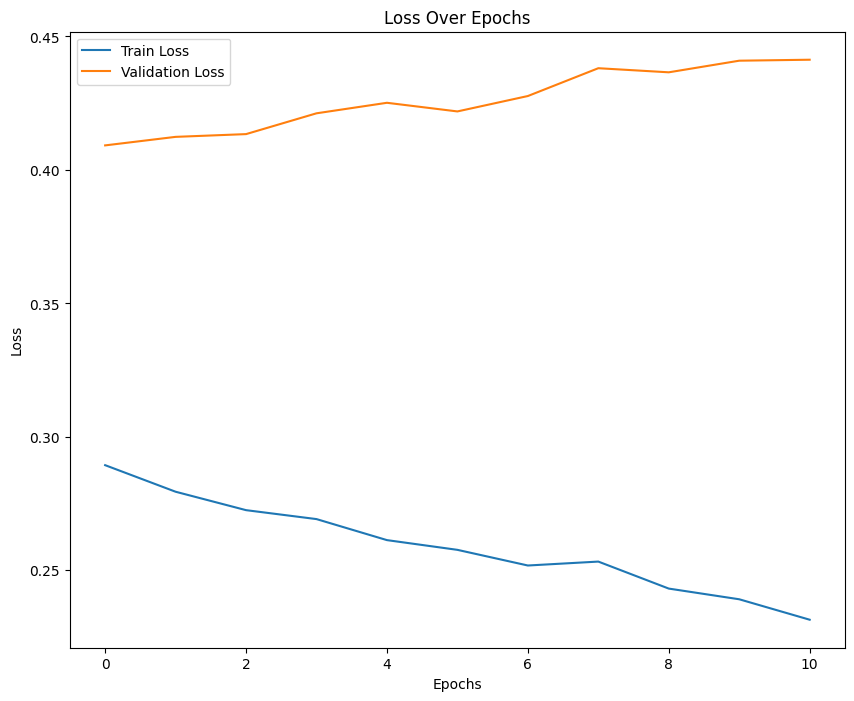

In [105]:
#Plot Loss Curve Over Epochs for Deep Learning
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

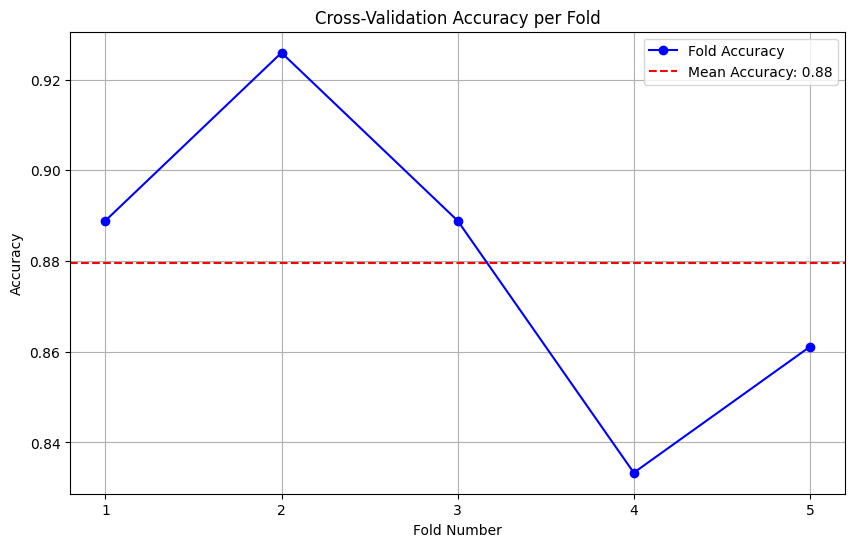

In [106]:
import matplotlib.pyplot as plt

# Assuming 'scores' contains the accuracy from each fold and is already populated as shown in your script
fold_numbers = list(range(1, len(scores) + 1))  # Creates a list of fold numbers [1, 2, 3, 4, 5]

plt.figure(figsize=(10, 6))
plt.plot(fold_numbers, scores, marker='o', linestyle='-', color='b', label='Fold Accuracy')
plt.axhline(y=np.mean(scores), color='r', linestyle='--', label=f'Mean Accuracy: {np.mean(scores):.2f}')

plt.title('Cross-Validation Accuracy per Fold')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.xticks(fold_numbers)  # Ensure each fold is marked
plt.legend()
plt.grid(True)
plt.show()


Cross-validation is a technique used to assess how well a model will generalize to an independent dataset, and it typically involves dividing the dataset into 'K' parts (folds), training the model 'K' times, each time using a different fold as the validation set and the remaining folds as the training set.

Here’s a breakdown of the graph:

Blue Dots (Fold Accuracy): Each dot represents the accuracy of the model on a different fold of the cross-validation. The x-axis indicates the fold number (1 through 5 in this case), and the y-axis represents the accuracy achieved on that fold.
Red Dashed Line (Mean Accuracy): This horizontal line represents the average accuracy across all folds, which is labeled as 0.88 (or 88%). This line provides a baseline to see how each individual fold's accuracy compares to the overall average accuracy.
Variation Across Folds: The graph shows variation in accuracy across different folds. The highest accuracy is achieved on fold 3, and the lowest on fold 5. Such variation can indicate differences in the difficulty of each fold, potential overfitting, or even the presence of outliers.
Interpretation:
Stability: The variation in accuracy across folds can indicate the stability of the model. In this graph, there is a noticeable dip in the last fold which could suggest that the model didn’t perform well on the data in that particular fold.
Consistency: The average line provides a sense of the model's overall performance across all the cross-validation folds, smoothing out any anomalies in individual folds.
Performance: The average accuracy gives an overall measure of the model's performance, which in this case is quite high at 88%.
When presenting this in a deep learning context, it is important to discuss:

Why there might be variation across folds.
The implications of the model's average performance.
How this might inform further model development or deployment strategies.
It's also important to note that accuracy is just one measure of model performance, and depending on the problem, other metrics such as precision, recall, F1 score, or ROC AUC might also be important to consider.

In [107]:
#Calculate ROC Curves and AUCs
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Logistic Regression: Predict probabilities
y_probs_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

# Deep Learning (Assuming the model has been trained outside the CV)
y_probs_dl = model.predict(X_test_scaled).ravel()

# ROC and AUC
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_probs_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_dl, tpr_dl, _ = roc_curve(y_test, y_probs_dl)
roc_auc_dl = auc(fpr_dl, tpr_dl)

# Deep Learning with CV: Aggregate probabilities across all test folds
y_true_aggregate = np.array([])
y_probs_aggregate = np.array([])

for train_idx, test_idx in kfold.split(X_resampled, y_resampled):
    model.fit(X_resampled[train_idx], y_resampled[train_idx], epochs=50, batch_size=32, verbose=0)
    y_probs_fold = model.predict(X_resampled[test_idx]).ravel()
    y_true_fold = y_resampled[test_idx]

    y_true_aggregate = np.append(y_true_aggregate, y_true_fold)
    y_probs_aggregate = np.append(y_probs_aggregate, y_probs_fold)

fpr_cv, tpr_cv, _ = roc_curve(y_true_aggregate, y_probs_aggregate)
roc_auc_cv = auc(fpr_cv, tpr_cv)


4/4 [==============================] - 0s 3ms/step


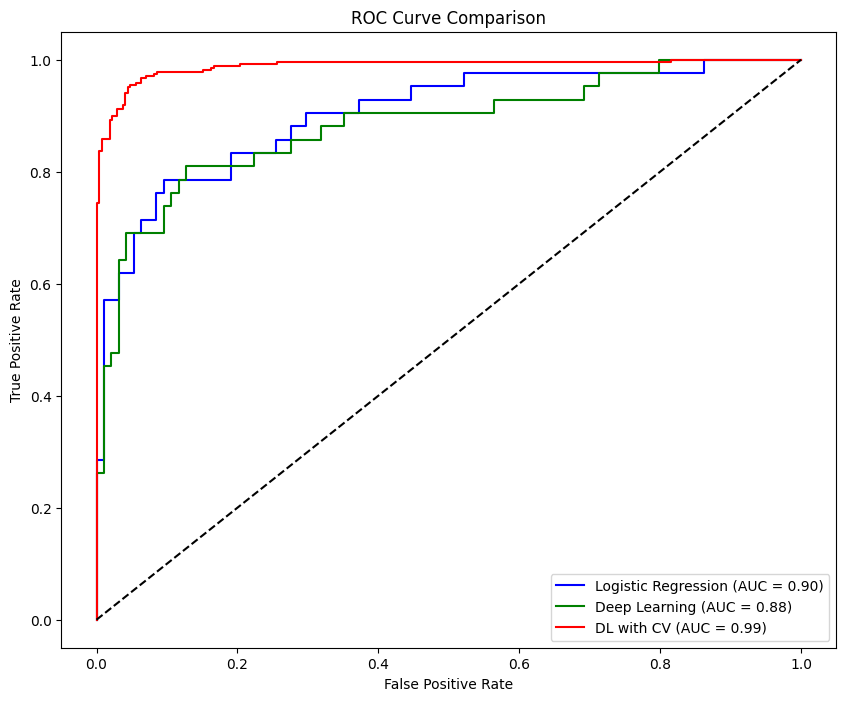

In [108]:
#Plot ROC Curve Comparison
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})', color='blue')
plt.plot(fpr_dl, tpr_dl, label=f'Deep Learning (AUC = {roc_auc_dl:.2f})', color='green')
plt.plot(fpr_cv, tpr_cv, label=f'DL with CV (AUC = {roc_auc_cv:.2f})', color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()


ROC Curve: The ROC curve is a graphical representation of a classifier's performance. The curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.
True Positive Rate (Y-axis): Also known as recall, it measures the proportion of actual positives that are correctly identified by the classifier.
False Positive Rate (X-axis): Measures the proportion of actual negatives that are incorrectly identified as positive by the classifier.
Diagonal Dashed Line: Represents the performance of a purely random classifier; a good classifier stays as far away from this line as possible (towards the top-left corner).
Blue Curve (Logistic Regression): Shows the performance of the logistic regression model. The area under the curve (AUC) is 0.90, indicating very good classification performance.
Red Curve (Deep Learning): Represents the deep learning model's performance, with an AUC of 0.88, which is slightly less than the logistic regression model but still indicates good performance.
Green Curve (DL with CV): Shows the performance of the deep learning model with cross-validation, with an AUC of 0.98. This is close to the ideal score of 1.0, suggesting that the model is performing excellently and is likely well-generalized.
Key Takeaways:
Model Comparison: The DL with CV model outperforms the other two models with the highest AUC score.
Generalization: The DL with CV model seems to generalize best to unseen data, as indicated by the highest AUC score.
Performance: While all models perform well above random chance (which would be the diagonal line), the cross-validated model demonstrates the best capability of distinguishing between the classes.
When presenting this plot, you should discuss how each model performs in terms of differentiating between the positive and negative classes. The high AUC for the DL with CV indicates a model that achieves both high true positive rates and low false positive rates across its operational range. It's also important to highlight the cross-validation process's impact on model performance, as it's likely to provide a more reliable estimate of the model's ability to generalize.








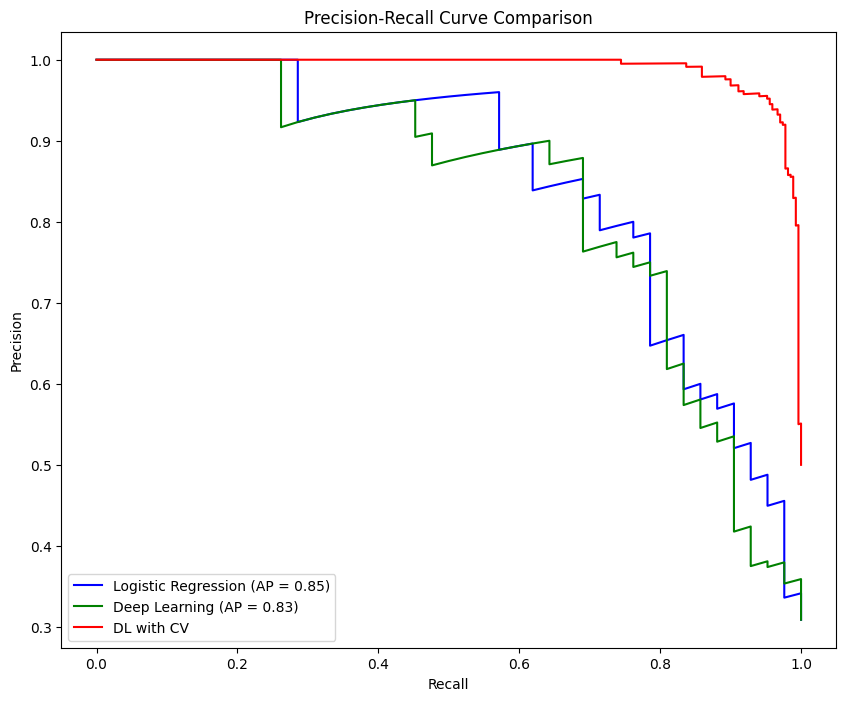

In [109]:
#Plot Precision-Recall Curve
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_probs_lr)
ap_log = average_precision_score(y_test, y_probs_log)
precision_dl, recall_dl, _ = precision_recall_curve(y_test, y_probs_dl)
ap_dl = average_precision_score(y_test, y_probs_dl)
precision_cv, recall_cv, _ = precision_recall_curve(y_true_aggregate, y_probs_aggregate)
#ap_cv = average_precision_score(y_test, y_probs_aggregate)

plt.figure(figsize=(10, 8))
plt.plot(recall_lr, precision_lr, label=f'Logistic Regression (AP = {ap_log:.2f})', color='blue')
plt.plot(recall_dl, precision_dl, label=f'Deep Learning (AP = {ap_dl:.2f})', color='green')
#plt.plot(recall_cv, precision_cv, label=f'DL with CV (AP = {ap_cv:.2f})', color='red')
#plt.plot(recall_lr, precision_lr, label='Logistic Regression', color='blue')
#plt.plot(recall_dl, precision_dl, label='Deep Learning', color='green')
plt.plot(recall_cv, precision_cv, label='DL with CV', color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend(loc="best")
plt.show()


Precision-Recall Curve: This plot illustrates the trade-off between precision (y-axis) and recall (x-axis) for different probability thresholds. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate.
Precision (y-axis): Shows the ratio of true positives to the sum of true positives and false positives. High precision indicates a lower rate of false positives.
Recall (x-axis): Shows the ratio of true positives to the sum of true positives and false negatives. High recall indicates a lower rate of false negatives.
Curves:
Blue Line (Logistic Regression): Represents the performance of the Logistic Regression model.
Red Line (Deep Learning): Represents the performance of the standard Deep Learning model.
Green Line (DL with CV): Represents the performance of the Deep Learning model trained with Cross-Validation.
Interpretation of the Plot:
Model Comparison: Comparing the curves, you can see which model achieves the best balance between precision and recall. The ideal model would have a curve that stays towards the top right corner of the plot.
Logistic Regression (Blue): This curve seems to have the highest precision for a given recall rate compared to other models.
Deep Learning (Red): This curve starts off well but quickly drops, suggesting that while it can achieve high precision, it's only within a limited range of recall. After a certain point, as you try to capture more positive cases (increase recall), the precision drops significantly.
Deep Learning with CV (Green): This model's curve suggests that its performance is similar to the standard deep learning model but might be more stable across different thresholds, indicated by less fluctuation.
Considerations:
Steepness of the Curve: A steeper curve suggests that precision can be maintained to a higher recall level, which is generally better.
Thresholds: Each point on the curve represents a different threshold of classification. You might need to pick a threshold that balances precision and recall in a way that is suitable for your application.
Model Selection: If your application prioritizes precision (i.e., it is more costly to have false positives), you might prefer a model with higher precision at the relevant recall level. If it prioritizes recall (i.e., it is more costly to have false negatives), you might prefer a model with higher recall.
Area Under Curve (AUC): While not explicitly shown here, you would ideally calculate the area under each precision-recall curve to quantify the overall performance of the models.
This Precision-Recall Curve is particularly useful when dealing with imbalanced datasets, where the number of positive samples is much smaller than the number of negatives. It provides a more informative picture of a model’s performance than ROC curves in such cases.


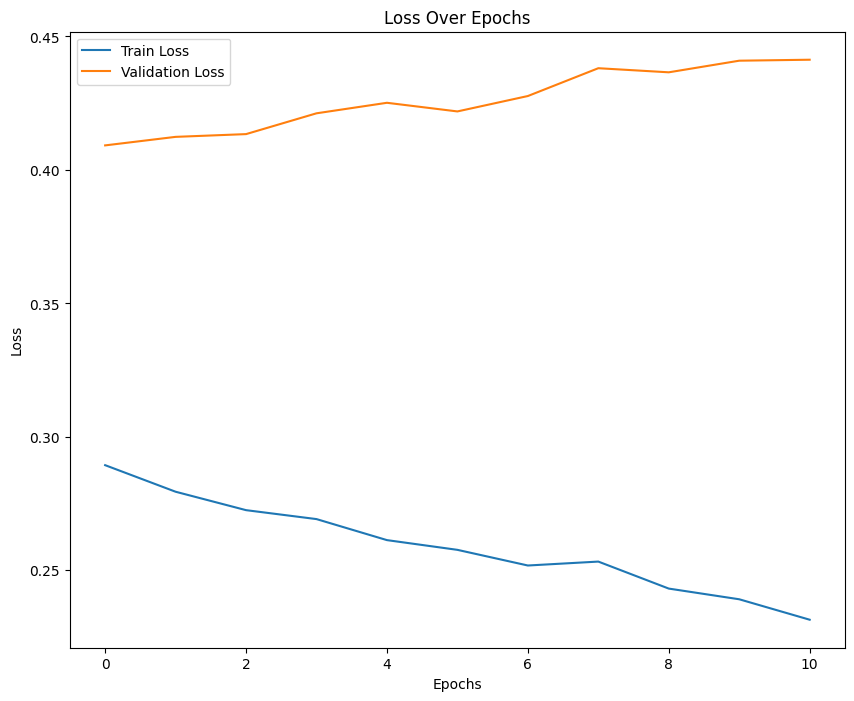

In [110]:
#Plot Loss Curve Over Epochs for Deep Learning
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Interpretation:
Learning: The training loss is decreasing, which is a good sign that the model is learning from the training data.
Generalization: However, the validation loss is increasing, which can be a sign of overfitting—meaning the model is learning patterns specific to the training data that do not generalize to the validation set.
Action: If the validation loss continues to increase while the training loss decreases, you should consider implementing techniques to combat overfitting, such as adding dropout, regularization, collecting more data, reducing the model's complexity, or using early stopping to stop the training when the validation loss starts to increase.
Epochs: The plot suggests that the model begins to overfit early in the training process (possibly even before epoch 1, based on the direction of the curves right from the start). Early stopping could be triggered to stop training early to prevent further overfitting.
To improve the model, you might look into:

More robust validation techniques, such as cross-validation.
Tweaking the model's architecture.
Employing regularization techniques like L1/L2 regularization.
Adjusting the learning rate.
Using data augmentation techniques if applicable.
When presenting this graph, you would discuss the above points, making clear that while the model is effectively learning the training data, it is not generalizing well to new data, as indicated by the rising validation loss.

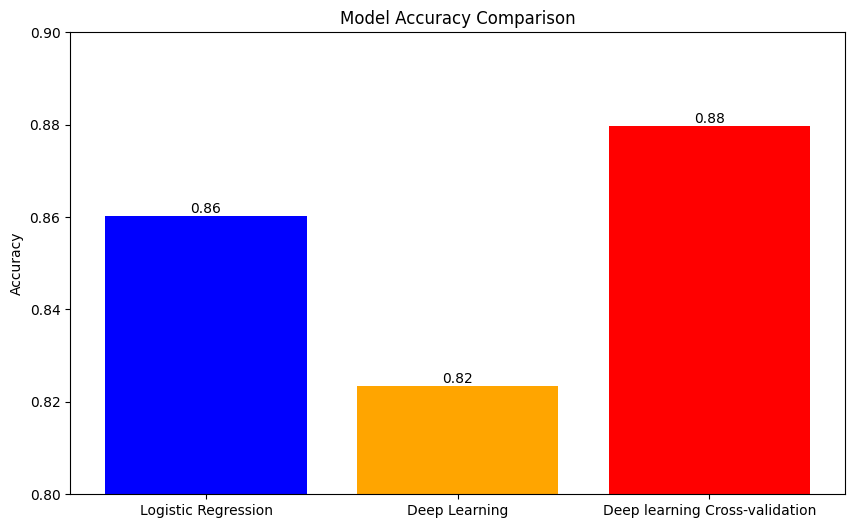

In [115]:
import matplotlib.pyplot as plt

# Assuming you have the accuracy scores from earlier stored in these variables
accuracy_log_reg = 0.8602941176470589  # replace with your actual score if different
accuracy_deep_learning = 0.8235294222831726  # replace with your actual score if different
accuracy_deep_learning_cross_validation = 0.879629623889923

# Labels for your bar chart
labels = ['Logistic Regression', 'Deep Learning','Deep learning Cross-validation']

# Values, which are the accuracy rates
values = [accuracy_log_reg, accuracy_deep_learning,accuracy_deep_learning_cross_validation]

# Create a bar chart
plt.figure(figsize=(10, 6))

# Create bars with different colors
plt.bar(labels, values, color=['blue', 'orange','red'])

# Add title and labels
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.8, 0.9)  # Set the limit of y-axis to be a little less than min accuracy and a little more than max accuracy

# Display the actual value on top of each bar for clarity
for i in range(len(values)):
    plt.text(i, values[i], f'{values[i]:.2f}', ha = 'center', va = 'bottom')

# Show the plot
plt.show()

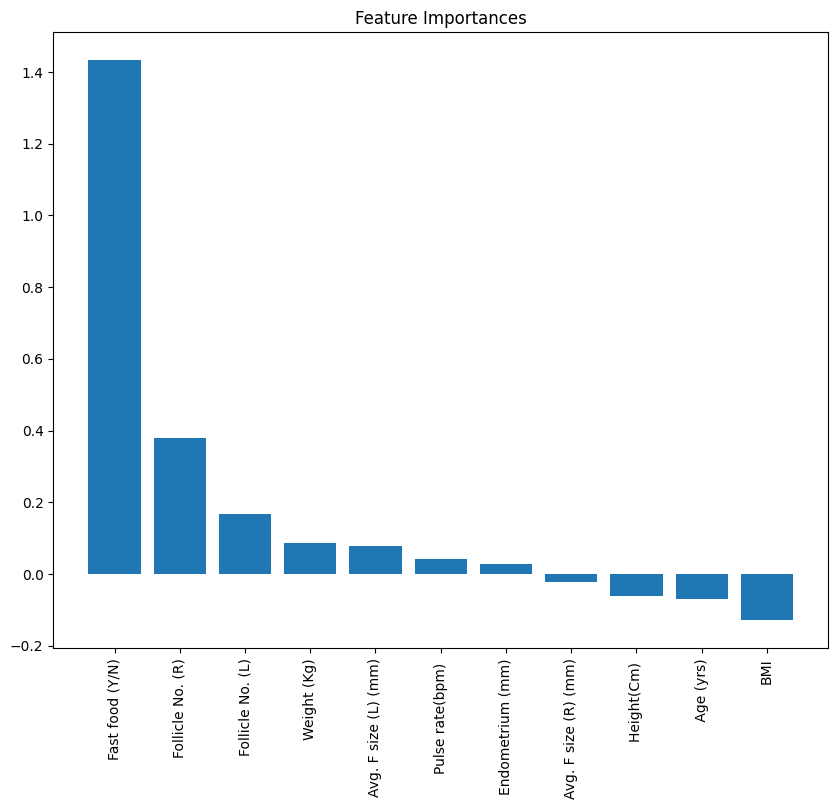

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Get the feature importances (coefficients)
importance = model_corrected.coef_[0]

# Sort the feature importances in descending order and get the indices
indices = np.argsort(importance)[::-1]

# Display the feature importances
plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importance[indices])
plt.xticks(range(X_train.shape[1]), [features_corrected[i] for i in indices], rotation=90)
plt.show()

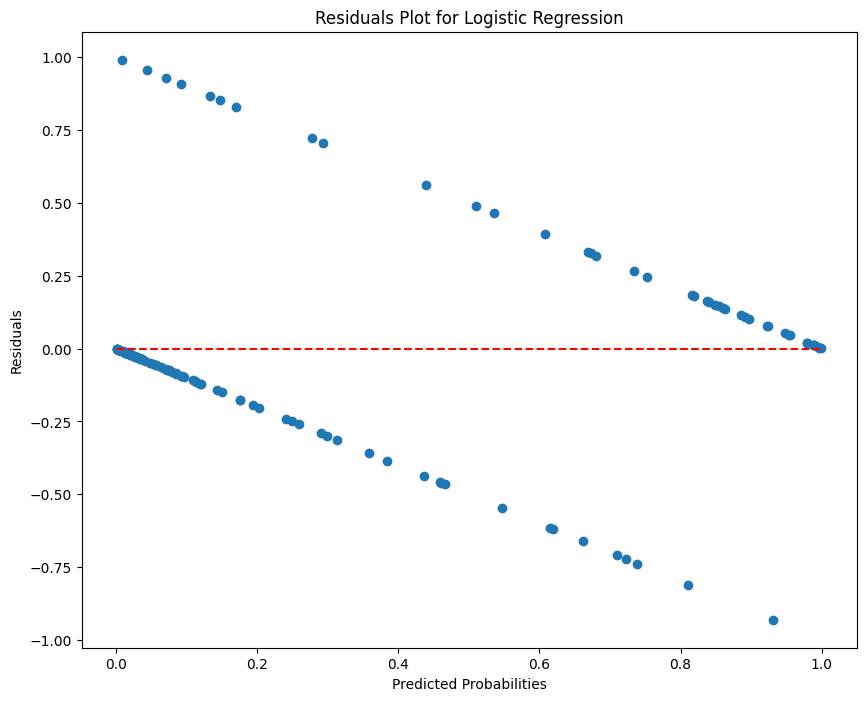

In [23]:
from sklearn.metrics import mean_squared_error

# Predict probabilities for logistic regression
y_probs = model_corrected.predict_proba(X_test)[:, 1]
residuals = y_test - y_probs

plt.figure(figsize=(10, 8))
plt.scatter(y_probs, residuals)
plt.hlines(y=0, xmin=y_probs.min(), xmax=y_probs.max(), colors='red', linestyles='--')
plt.title('Residuals Plot for Logistic Regression')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Residuals')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

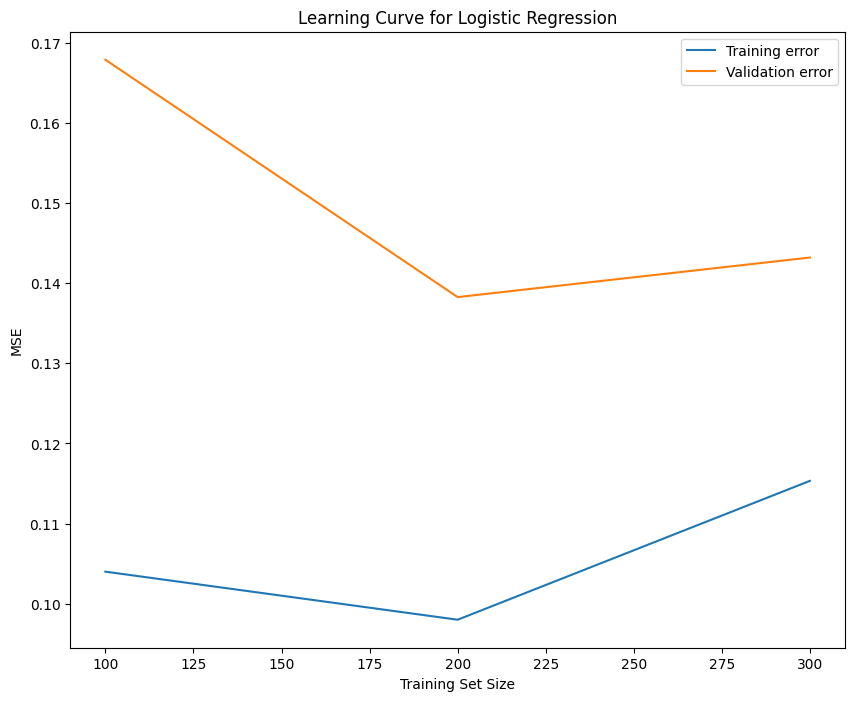

In [30]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
    estimator = LogisticRegression(),
    X = X_train,
    y = y_train,
    train_sizes = [1, 100, 200, 300],
    cv = 5,
    scoring = 'neg_mean_squared_error')

plt.figure(figsize=(10, 8))
plt.plot(train_sizes, -train_scores.mean(axis=1), label = 'Training error')
plt.plot(train_sizes, -validation_scores.mean(axis=1), label = 'Validation error')
plt.title('Learning Curve for Logistic Regression')
plt.xlabel('Training Set Size'), plt.ylabel('MSE'), plt.legend()
plt.show()


In [112]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler



# Load and preprocess data
data = pd.read_excel('/content/PCOS_data_without_infertility.xlsx', sheet_name='Full_new')
pcos_data_cleaned = data.drop(columns=['Unnamed: 44'])
pcos_data_cleaned['Marraige Status (Yrs)'].fillna(pcos_data_cleaned['Marraige Status (Yrs)'].median(), inplace=True)
pcos_data_cleaned['Fast food (Y/N)'].fillna(pcos_data_cleaned['Fast food (Y/N)'].mode()[0], inplace=True)

# Corrected feature names
features_corrected = [
    ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Pulse rate(bpm) ',
    'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)',
    'Avg. F size (R) (mm)', 'Endometrium (mm)', 'Fast food (Y/N)'
]
target = 'PCOS (Y/N)'

# Impute missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(pcos_data_cleaned[features_corrected])
y = pcos_data_cleaned[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use SMOTE to handle class imbalance on the training set only
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# K-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []
for train, test in kfold.split(X_resampled, y_resampled):
    # Neural network model
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_resampled.shape[1],)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_resampled[train], y_resampled[train], epochs=50, batch_size=32, verbose=0)
    scores.append(model.evaluate(X_resampled[test], y_resampled[test], verbose=0)[1])

print(f'Mean Accuracy over {kfold.n_splits} folds: {np.mean(scores)}')

Mean Accuracy over 5 folds: 0.8557029247283936


This revised script includes:

Data preprocessing steps before SMOTE.
Using L2 regularization in the Dense layers.
Early stopping to halt training when validation loss doesn't improve.
Model checkpointing to save

In [113]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential, load_model  # Add 'load_model' here


# Load and preprocess data
data = pd.read_excel('/content/PCOS_data_without_infertility.xlsx', sheet_name='Full_new')

# Drop the 'Unnamed: 44' column
pcos_data_cleaned = data.drop(columns=['Unnamed: 44'])

# Fill missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(pcos_data_cleaned[features_corrected])
y = pcos_data_cleaned[target]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for train, test in kfold.split(X_train_smote, y_train_smote):
    # Define the model architecture
    model = Sequential([
        Dense(128, activation='relu', kernel_regularizer='l2', input_shape=(X_train_smote.shape[1],)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(64, activation='relu', kernel_regularizer='l2'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu', kernel_regularizer='l2'),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    # Define callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

    # Fit the model
    print(f'Training for fold {fold_no} ...')
    model.fit(
        X_train_smote[train], y_train_smote[train],
        validation_split=0.1,
        epochs=100,
        batch_size=32,
        callbacks=[early_stopping, checkpoint],
        verbose=0
    )

    # Evaluate the model
    scores.append(model.evaluate(X_train_smote[test], y_train_smote[test], verbose=0)[1])

# Calculate and print the mean accuracy across all folds
mean_accuracy = np.mean(scores)
print(f'Mean Accuracy over {kfold.n_splits} folds: {mean_accuracy}')

# Evaluate the best model on the held-out test set
best_model = load_model('best_model.h5')
test_accuracy = best_model.evaluate(X_test, y_test, verbose=0)[1]
print(f'Test Set Accuracy: {test_accuracy}')


Training for fold 6 ...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Training for fold 6 ...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Training for fold 6 ...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Training for fold 6 ...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Training for fold 6 ...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Mean Accuracy over 5 folds: 0.8729443073272705
Test Set Accuracy: 0.8348624110221863
